In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing data Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [160]:
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
gender = df["Gender"]

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Checking Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


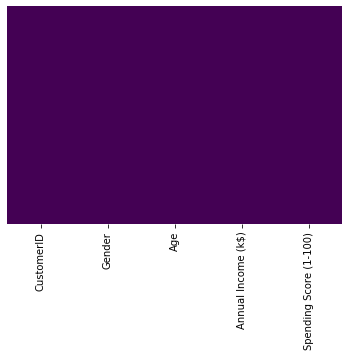

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.

In [7]:
df.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


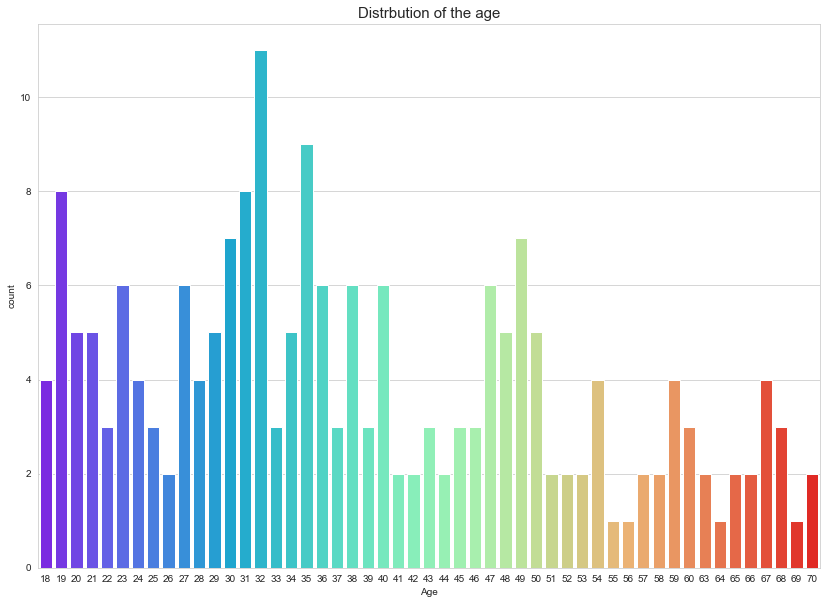

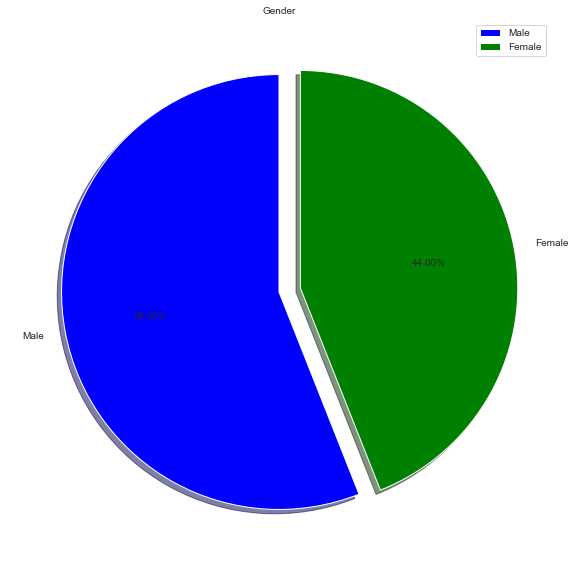

In [170]:
#find relation ship among the data sets
#percentage of mail and feail
sns.countplot(df['Age'],palette = 'rainbow')
plt.title('Distrbution of the age',fontsize=15)
label=['Male','Female']
values=df['Gender'].value_counts().values
colors=['blue','green']
fig,ax1=plt.subplots()
plt.axis('off')
explode = [0, 0.1]
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct ='%.2f%%',explode = explode,colors=colors)
plt.title('Gender', fontsize =10)
plt.legend()
plt.show()

No handles with labels found to put in legend.


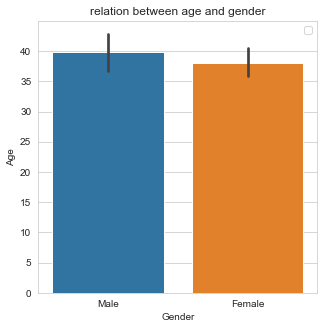

In [165]:
plt.figure(figsize=(5,5))
sns.barplot(x='Gender',y='Age',data=df)
plt.title('relation between age and gender')
plt.legend()

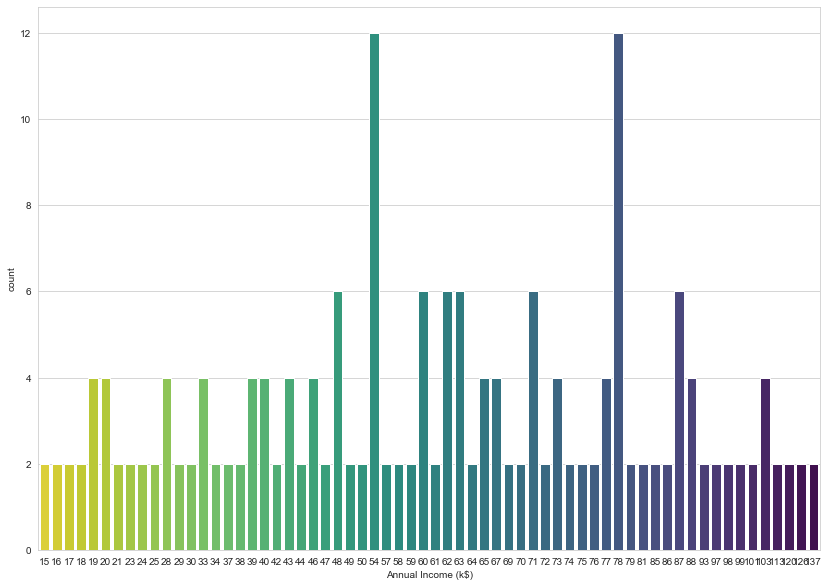

<Figure size 1080x1080 with 0 Axes>

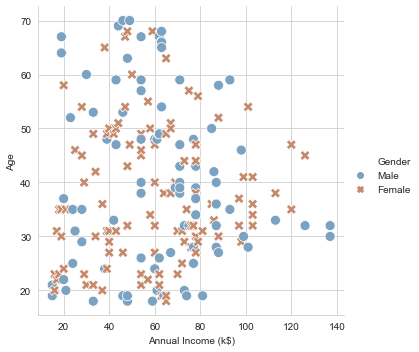

In [167]:

plt.rcParams['figure.figsize']=(14,10)
sns.countplot(df['Annual Income (k$)'],palette='viridis_r')
#relation
plt.figure(figsize=(15,15))
sns.relplot(y='Age',x='Annual Income (k$)',hue='Gender',style='Gender',data=df,s=100,label='Gender',palette='twilight_shifted')

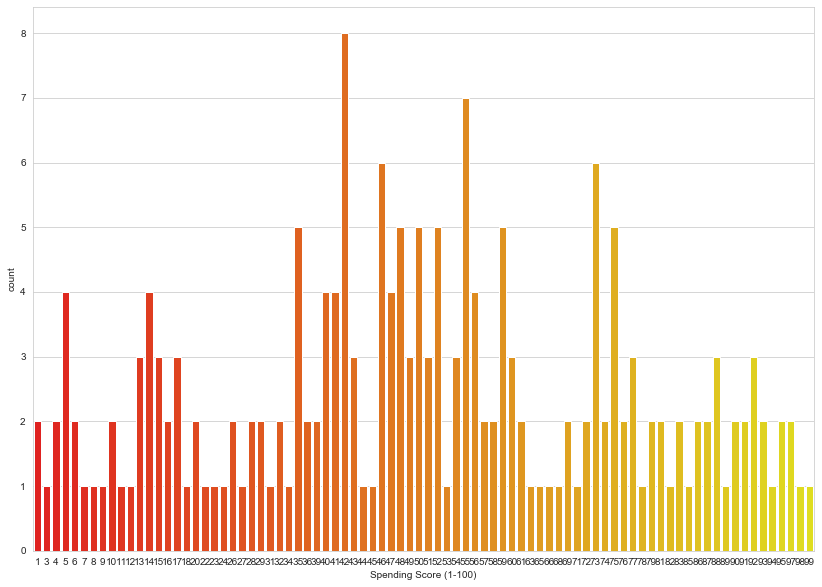

In [169]:
sns.countplot(df['Spending Score (1-100)'], palette='autumn')

# To check correlation


In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


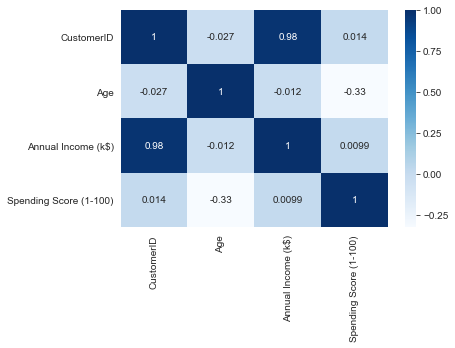

In [174]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

- Dark shades represents positive correlation while lighter shades represents negative correlation.
- If you set cannot=True, you'll get values by which features are correlated to each other in grid-cells

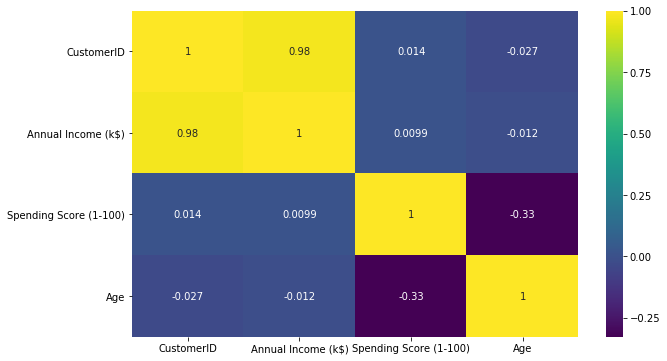

In [10]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'CustomerID')['CustomerID'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# To check Outliers


In [11]:
df.columns.values

array(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [55]:
df["Gender"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

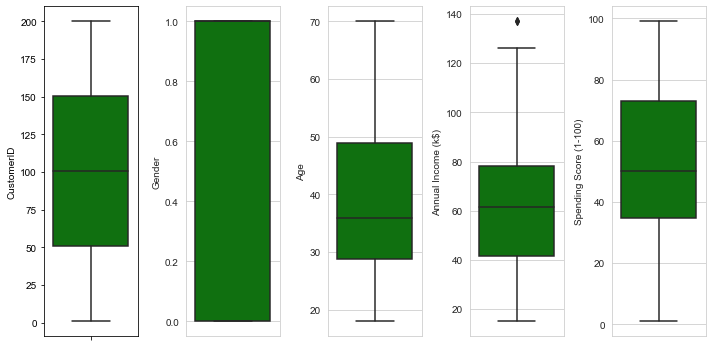

In [13]:
l = df.columns.values
number_of_columns=5
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()


Only in Anual Income outliers can be seen.

# To check distribution-

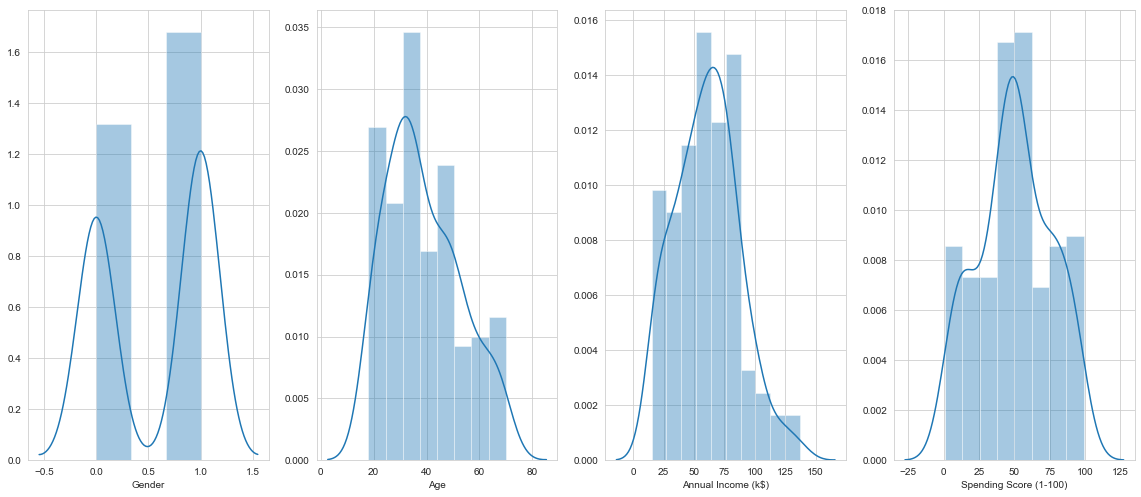

In [14]:
plt.figure(figsize=(5*number_of_columns,10*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 


It seems like all the column data values are properly skewed. However Annual Income and spending score has slight negative and positive skewness.  

# To check statistics

In [15]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [16]:
spending = df["Spending Score (1-100)"]
statistics(spending)


,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


In [17]:
statistics(df["Age"])

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


In [18]:
statistics(gender)

,Gender
Female,112
Male,88


In [19]:
spending = df["Annual Income (k$)"]
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


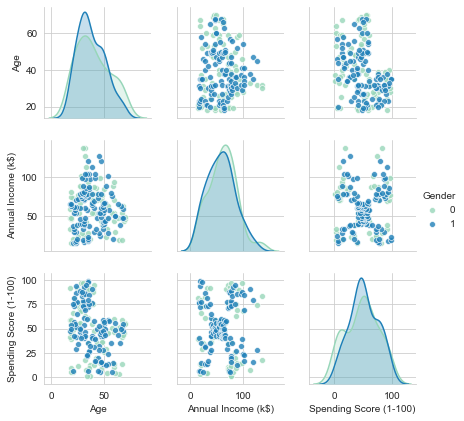

In [20]:
sns.pairplot(df, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

## K-means Clustering

In [27]:
from sklearn.cluster import KMeans

In [21]:
# Cluster by Age and Annual Income
datakmeans=df[['Age','Annual Income (k$)']]

# fill the missing values with mean

datakmeans['Age'] = datakmeans['Age'].fillna((datakmeans['Age'].mean()))
datakmeans['Annual Income (k$)'] = datakmeans['Annual Income (k$)'].fillna((datakmeans['Annual Income (k$)'].mean()))

C:\Users\bathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
datakmeans.isnull().sum()

Age                   0
Annual Income (k$)    0
dtype: int64

In [23]:
datakmeans.head(20)

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


In [24]:
X = np.asarray(datakmeans)

Text(0.5, 1.0, 'Grafik Spec Mobil')

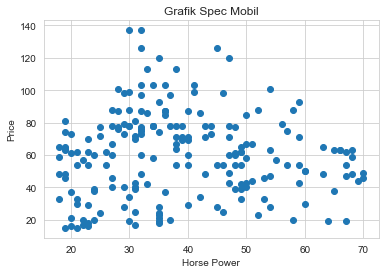

In [25]:
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Annual Income for different age groups")

In [177]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

-0.06238482898243888

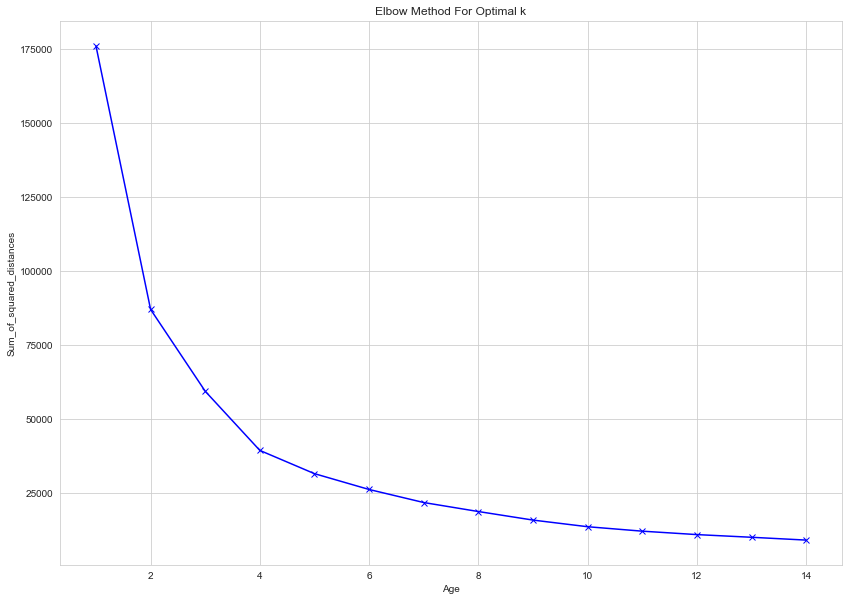

In [180]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Age')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [148]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [149]:

print(kmeans.cluster_centers_)

[[ 30.34693878  29.26530612]
 [ 55.81481481  51.77777778]
 [ 31.95890411  72.95890411]
 [ 39.         106.5       ]]


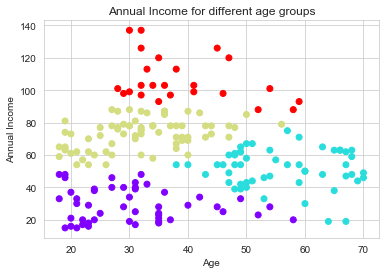

In [150]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Annual Income for different age groups")
plt.show()

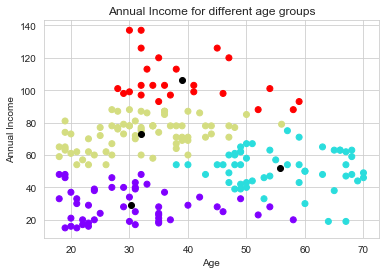

In [151]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Annual Income for different age groups")
plt.show()

In [39]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

In [40]:
a=pd.DataFrame(kmeans.labels_)
outputkmeans=pd.concat([df,a],axis=1)
outputkmeans=outputkmeans.rename(columns={0:'cluster'})
outputkmeans

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
5,6,1,22,17,76,0
6,7,1,35,18,6,0
7,8,1,23,18,94,0
8,9,0,64,19,3,2
9,10,1,30,19,72,0


In [41]:
result=outputkmeans['cluster'].value_counts()
result=pd.DataFrame(result)
result

,cluster
1,91
2,58
0,51


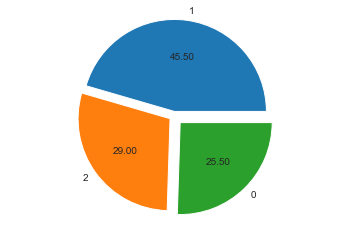

In [42]:
explode = (0.05, 0.05, 0.1)

plt.pie(result['cluster'],labels=result.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

### K- Mens Clustering based on Gender and Spending score.

In [45]:
df = pd.read_csv('customers.csv')

In [183]:
# Cluster by price and horse power
datakmeans1=df[['Age','Spending Score (1-100)']]

# fill the missing values with mean

datakmeans1['Age'] = datakmeans1['Age'].fillna((datakmeans1['Age'].mean()))
datakmeans1['Spending Score (1-100)'] = datakmeans1['Spending Score (1-100)'].fillna((datakmeans1['Spending Score (1-100)'].mean()))

C:\Users\bathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [62]:
datakmeans1.isnull().sum()

Age                       0
Spending Score (1-100)    0
dtype: int64

In [63]:
X1 = np.asarray(datakmeans1)

Text(0.5, 1.0, 'Grafik Spec Mobil')

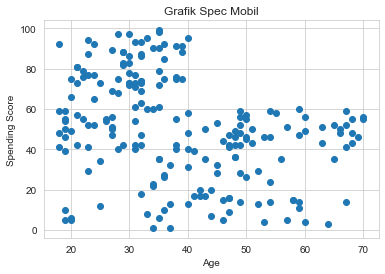

In [64]:
plt.scatter(X1[:,0],X1[:,1], label = 'True Position')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending Score accoding to Age")

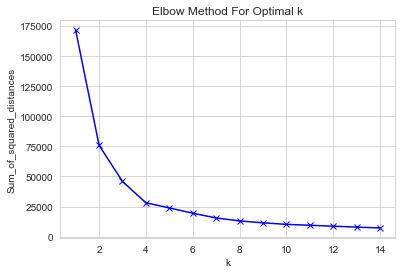

In [65]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Age')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [152]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
print(kmeans.cluster_centers_)

[[ 55.67857143  50.03571429]
 [ 32.2972973   72.98648649]
 [ 28.82608696  29.41304348]
 [ 39.         106.5       ]]


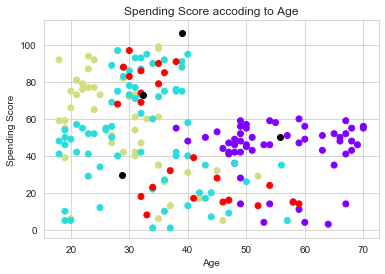

In [154]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending Score accoding to Age")
plt.show()

Looks like Gender and Spending score is not properly distributed according to K means technique

Lets try DBSCAN

## DBSCAN Clustering

In [77]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [141]:
dbscan = DBSCAN(eps=10, min_samples=20)
dbscan.fit(X1)

DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [142]:
print(dbscan.labels_)

[-1  0 -1  0  1  0 -1  0 -1  0 -1  0 -1  0 -1  0  2  0 -1  0  2  0 -1  0
 -1  0  2  0  2  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  2  0 -1  0  2  1
  1  1  2  0  1  2  2  2  2 -1  1  2 -1  1 -1  2  2  1  2 -1  1  1 -1  2
  2  2  2  1  2  2  1  2  2  2 -1  2  1  2  2  1  0  2 -1  1  2  2  1  1
  2  1  2  1  1  2 -1  1  2  1  2  2 -1  2  2  1  2  1  1  1  2  2  2  2
  1  2  2  0 -1  0  2  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  1  0
 -1  0  2  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  2  0 -1  0 -1  0 -1  0
 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  2  0 -1  0  2  0 -1  0 -1  0 -1  0
 -1  0 -1  0 -1  0 -1  0]


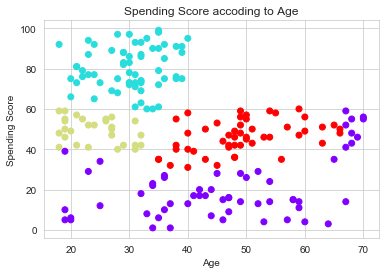

In [143]:
plt.scatter(X1[:,0],X1[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending Score accoding to Age")
plt.show()

In [136]:
c=pd.DataFrame(dbscan.labels_)
outputDBSCAN=pd.concat([df,c],axis=1)
outputDBSCAN=outputDBSCAN.rename(columns={0:'cluster'})
outputDBSCAN

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,-1
1,2,0,21,15,81,0
2,3,1,20,16,6,-1
3,4,1,23,16,77,0
4,5,1,31,17,40,1
5,6,1,22,17,76,0
6,7,1,35,18,6,-1
7,8,1,23,18,94,0
8,9,0,64,19,3,-1
9,10,1,30,19,72,0


In [133]:
resultDBSCAN=outputDBSCAN['cluster'].value_counts()
resultDBSCAN=pd.DataFrame(resultDBSCAN)
resultDBSCAN

,cluster
0,64
-1,58
2,50
1,28


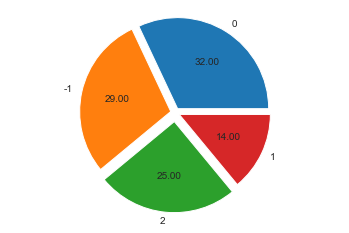

In [134]:
explode = (0.05, 0.05, 0.1,0.05)

plt.pie(resultDBSCAN['cluster'],labels=resultDBSCAN.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()